# -------------------------------Experiment - 12------------------------------------

# Consider the Mnist dataset preprocess and built simple Sequential neural network on it. Test and evaluete the model using different metrics.

In [1]:
# import the libraies 

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np     

In [2]:
# Optional: to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset 

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Length 

len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

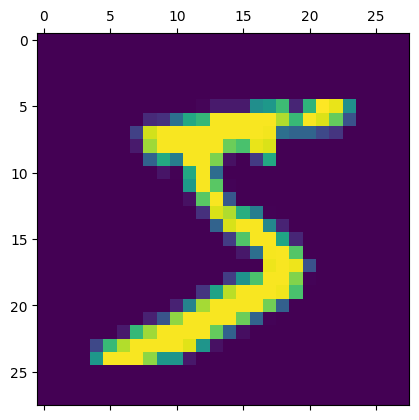

In [7]:
# plot the 

plt.matshow(X_train[0])
plt.show()

In [8]:
y_train[0]

5

In [9]:
#

X_train = X_train / 255
X_test = X_test / 255

In [10]:
# Reshape the 

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
# Fit the model 

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8801 - loss: 0.4629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9148 - loss: 0.3033
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9241 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9253 - loss: 0.2669


In [13]:
# Evaluate the model 

model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.2681


[0.268134206533432, 0.9230999946594238]

In [14]:
# Predict the model

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.8316835e-02, 3.1572100e-07, 4.0353540e-02, 9.5976329e-01,
       2.4517286e-03, 7.7603772e-02, 1.5888976e-06, 9.9975199e-01,
       9.4602108e-02, 6.0658681e-01], dtype=float32)

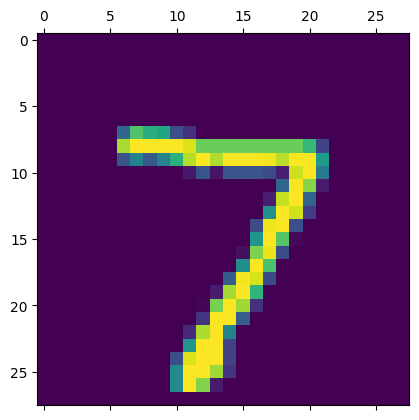

In [15]:
# Show the predict plot 
plt.matshow(X_test[0])

In [16]:
np.argmax(y_predicted[0])

7

In [17]:


y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
print("Classification Report:\n", classification_report(y_test, y_predicted_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.89      0.92      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.92      0.85      0.89       892
           6       0.93      0.96      0.95       958
           7       0.92      0.93      0.92      1028
           8       0.84      0.90      0.87       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [20]:


cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    6,    9,    3,    4,    0],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,   12,  906,   22,    6,    3,   11,   13,   52,    3],
       [   2,    1,   16,  928,    0,   17,    2,   12,   25,    7],
       [   1,    1,    4,    2,  914,    0,   12,    5,   11,   32],
       [   9,    3,    1,   37,    9,  759,   17,    9,   42,    6],
       [   7,    3,    5,    2,    7,   11,  918,    2,    3,    0],
       [   1,    5,   19,    9,    7,    0,    0,  955,    4,   28],
       [   4,    7,    5,   23,    9,   19,   10,   12,  880,    5],
       [   9,    7,    1,   12,   28,    6,    0,   29,    9,  908]])>

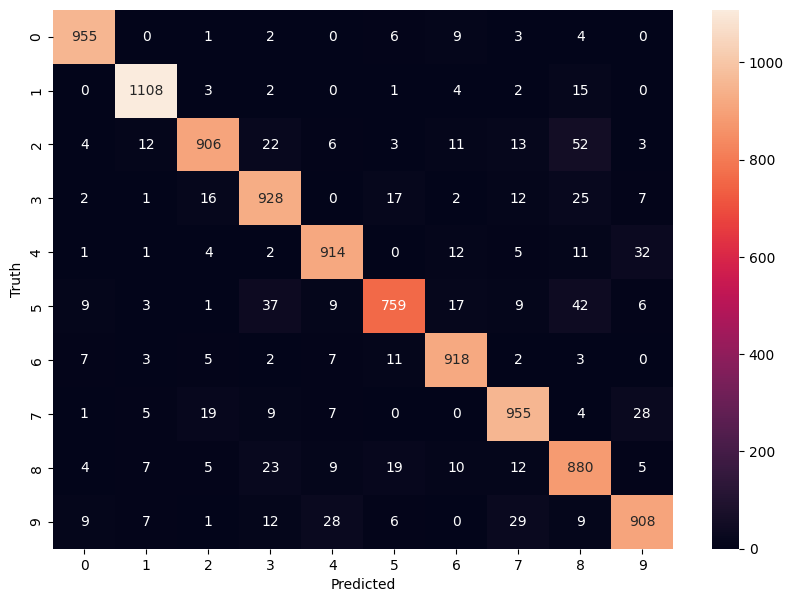

In [21]:
# Show the heat map 

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()